### Sistema p-Fuzzy Discreto: Predador-Presa


Este notebook implementa um **sistema dinâmico p-fuzzy discreto** para modelar a interação entre **presas e predadores**, baseado no exemplo do livro:

> Barros, L. C., Bassanezi, R. C., & Lodwick, W. A. (2017).  
> *A First Course in Fuzzy Logic, Fuzzy Dynamical Systems, and Biomathematics*

---

### 🎯 O que é um Sistema p-Fuzzy?

Um **sistema p-fuzzy** é um sistema dinâmico onde a função de evolução é definida por **regras fuzzy** ao invés de equações matemáticas explícitas.

#### Sistema Discreto:
$$x_{n+1} = x_n + f(x_n)$$

Onde $f(x_n)$ é determinado por um **Sistema de Inferência Fuzzy (FIS)**.

---

### 🦊 Modelo Predador-Presa

O modelo clássico de Lotka-Volterra descreve a interação entre duas espécies:
- **Presas** (população x₁)
- **Predadores** (população x₂)

A base de regras considera **4 níveis linguísticos** para cada espécie:
- **B** (Baixa)
- **MB** (Média-Baixa)  
- **MA** (Média-Alta)
- **A** (Alta)

E define **16 regras** que determinam a variação populacional.

---

In [ ]:
# Instalar pyfuzzy-toolbox (para notebooks no colab)
!pip install pyfuzzy-toolbox matplotlib numpy -q

In [1]:
# import fuzzy_systems as fs
import numpy as np
import matplotlib.pyplot as plt

from fuzzy_systems import MamdaniSystem
from fuzzy_systems.dynamics import PFuzzyDiscrete


print("✅ Bibliotecas importadas com sucesso!")

Automatic parallelization (joblib)
✅ Bibliotecas importadas com sucesso!


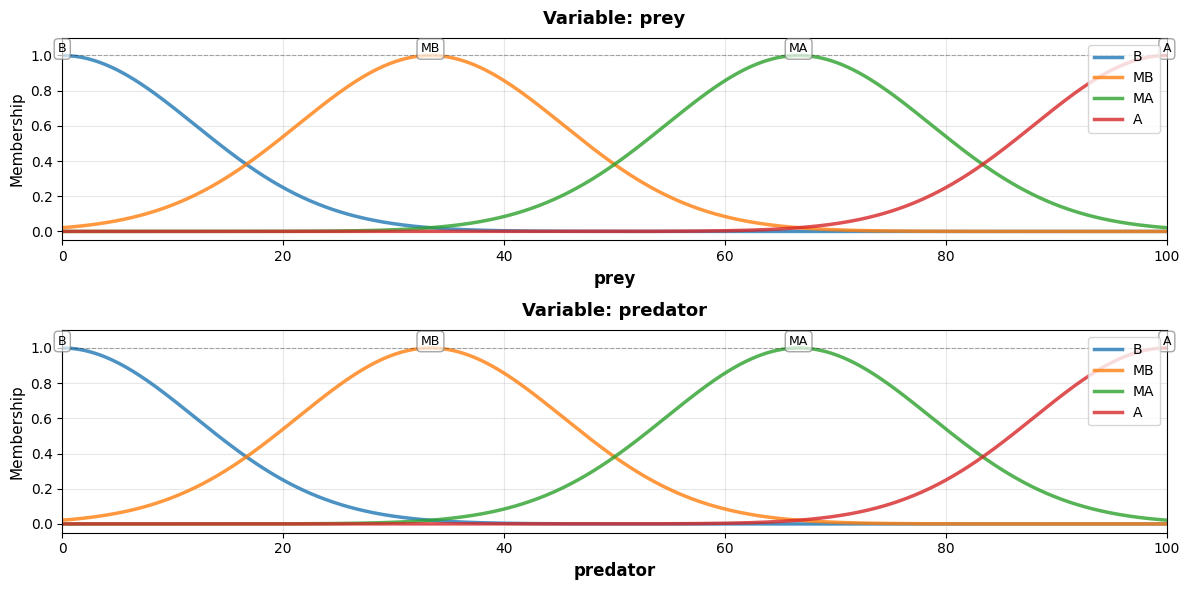

In [2]:
# Criar sistema Mamdani para predador-presa
fis = MamdaniSystem(name="Predador-Presa Discreto")

# ========================================
# ENTRADAS: Presas (x) e Predadores (y)
# ========================================

# Universo de discurso: [0, 100] para ambas
fis.add_input('prey', (0, 100))
fis.add_input('predator', (0, 100))

# Termos linguísticos (4 níveis como no livro)
for var in ['prey', 'predator']:
    fis.add_term(var, 'B', 'gaussian', (0, 12))    # Baixa
    fis.add_term(var, 'MB', 'gaussian', (100/3, 12))   # Média-Baixa
    fis.add_term(var, 'MA', 'gaussian', (2*100/3, 12))   # Média-Alta
    fis.add_term(var, 'A', 'gaussian', (100, 12))    # Alta

fis.plot_variables()

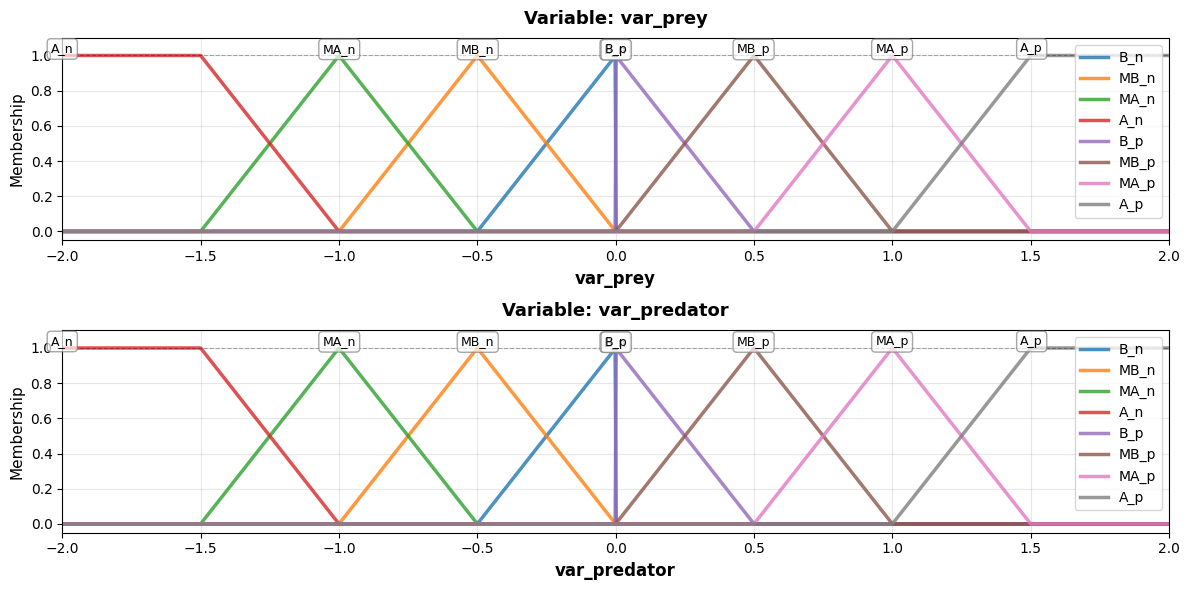

In [3]:
# ========================================
# SAÍDAS: Variação de Presas e Predadores
# ========================================

# Saída 1: Δprey (variação de presas)
var_prey_universe = (-2,2)
lrg = 0.5

fis.add_output('var_prey', var_prey_universe)
fis.add_term('var_prey', 'B_n', 'triangular', (-lrg,0,0))
fis.add_term('var_prey', 'MB_n', 'triangular', (-2*lrg,-lrg, 0))
fis.add_term('var_prey', 'MA_n', 'triangular', (-3*lrg, -2*lrg, -lrg))
fis.add_term('var_prey', 'A_n', 'trapezoidal', (-4*lrg,-4*lrg, -3*lrg, -2*lrg))
fis.add_term('var_prey', 'B_p', 'triangular', (0, 0, lrg))
fis.add_term('var_prey', 'MB_p', 'triangular', (0, lrg, 2*lrg))
fis.add_term('var_prey', 'MA_p', 'triangular', (lrg, 2*lrg, 3*lrg))
fis.add_term('var_prey', 'A_p', 'trapezoidal', (2*lrg, 3*lrg, 4*lrg,4*lrg))

var_predator_universe = (-2,2)
lrg = 0.5

fis.add_output('var_predator', var_predator_universe)
fis.add_term('var_predator', 'B_n', 'triangular', (-lrg,0,0))
fis.add_term('var_predator', 'MB_n', 'triangular', (-2*lrg,-lrg, 0))
fis.add_term('var_predator', 'MA_n', 'triangular', (-3*lrg, -2*lrg, -lrg))
fis.add_term('var_predator', 'A_n', 'trapezoidal', (-4*lrg,-4*lrg, -3*lrg, -2*lrg))
fis.add_term('var_predator', 'B_p', 'triangular', (0, 0, lrg))
fis.add_term('var_predator', 'MB_p', 'triangular', (0, lrg, 2*lrg))
fis.add_term('var_predator', 'MA_p', 'triangular', (lrg, 2*lrg, 3*lrg))
fis.add_term('var_predator', 'A_p', 'trapezoidal', (2*lrg, 3*lrg, 4*lrg,4*lrg))


fis.plot_variables(['var_prey','var_predator'])


(<Figure size 1400x800 with 2 Axes>,
 <Axes: title={'center': 'Fuzzy Rule Base Visualization'}, ylabel='Rules'>)

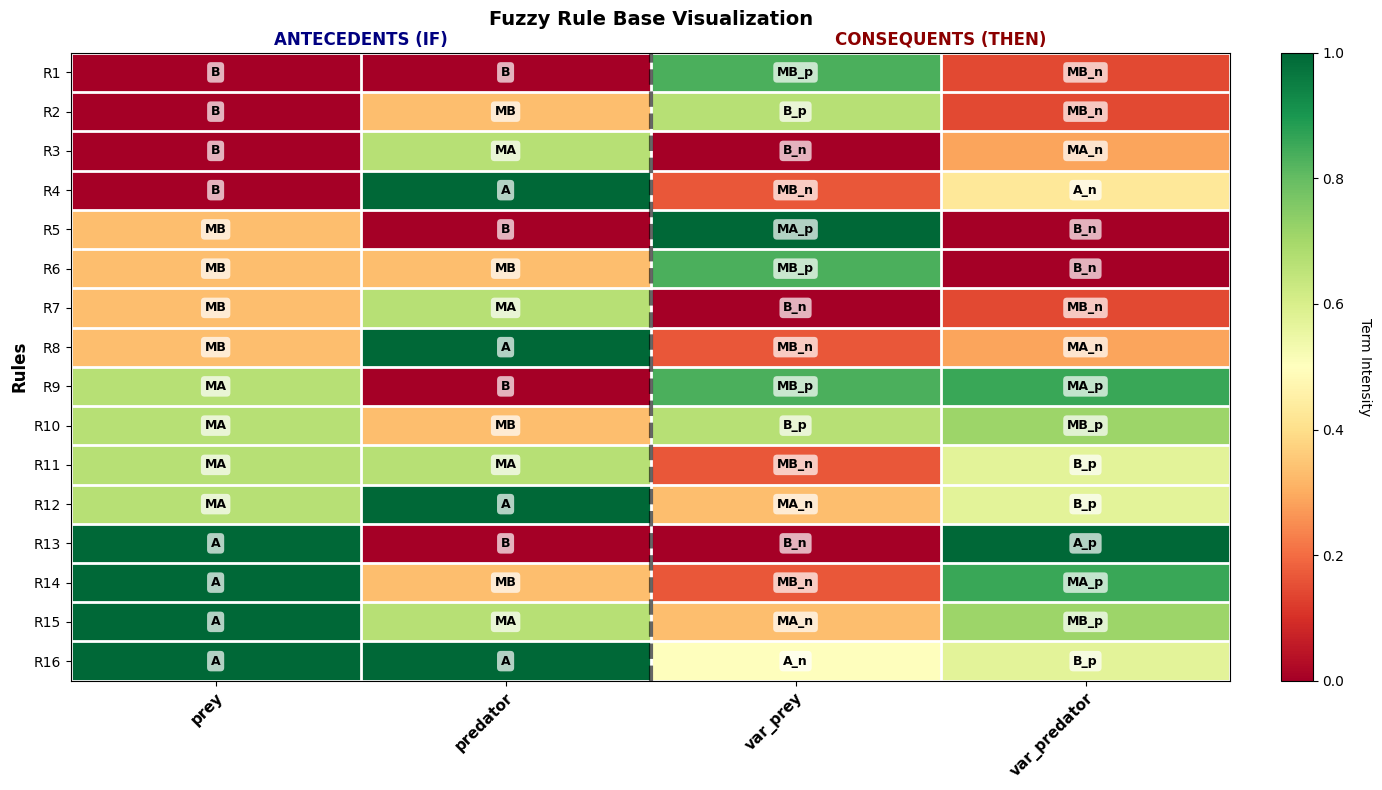

In [4]:
# ========================================
# BASE DE REGRAS (16 regras)
# ========================================

# Definir regras usando sintaxe de tupla plana
# Formato: ('prey_term', 'predator_term', 'd_prey_term', 'd_predator_term')

rules = [
    # Linha 1: prey = B (baixa)
    ('B', 'B', 'MB_p', 'MB_n'),
    ('B', 'MB', 'B_p', 'MB_n'),
    ('B', 'MA', 'B_n', 'MA_n'),
    ('B', 'A', 'MB_n', 'A_n'),
    
    # Linha 2: prey = MB (média-baixa)
    ('MB', 'B', 'MA_p', 'B_n'),
    ('MB', 'MB', 'MB_p', 'B_n'),
    ('MB', 'MA', 'B_n', 'MB_n'),
    ('MB', 'A', 'MB_n', 'MA_n'),
    
    # Linha 3: prey = MA (média-alta)
    ('MA', 'B', 'MB_p', 'MA_p'),
    ('MA', 'MB', 'B_p', 'MB_p'),
    ('MA', 'MA', 'MB_n', 'B_p'),
    ('MA', 'A', 'MA_n', 'B_p'),
    
    # Linha 4: prey = A (alta)
    ('A', 'B', 'B_n', 'A_p'),
    ('A', 'MB', 'MB_n', 'MA_p'),
    ('A', 'MA', 'MA_n', 'MB_p'),
    ('A', 'A', 'A_n', 'B_p')
]

# Adicionar regras ao FIS usando a nova sintaxe
fis.add_rules(rules)
fis.plot_rule_matrix()

# Use fis.export_rules(filename) to save the rules
# Use fis.import_rules(filename) to import rules
# Use fis.save(filename) to save the fis interily
# Use fis.load(filename) to load a fis

In [5]:
# Criar sistema p-fuzzy discreto
pfuzzy = PFuzzyDiscrete(
    fis=fis,
    mode='absolute',  # x_{n+1} = x_n + f(x_n)
    state_vars=['prey', 'predator'],
)


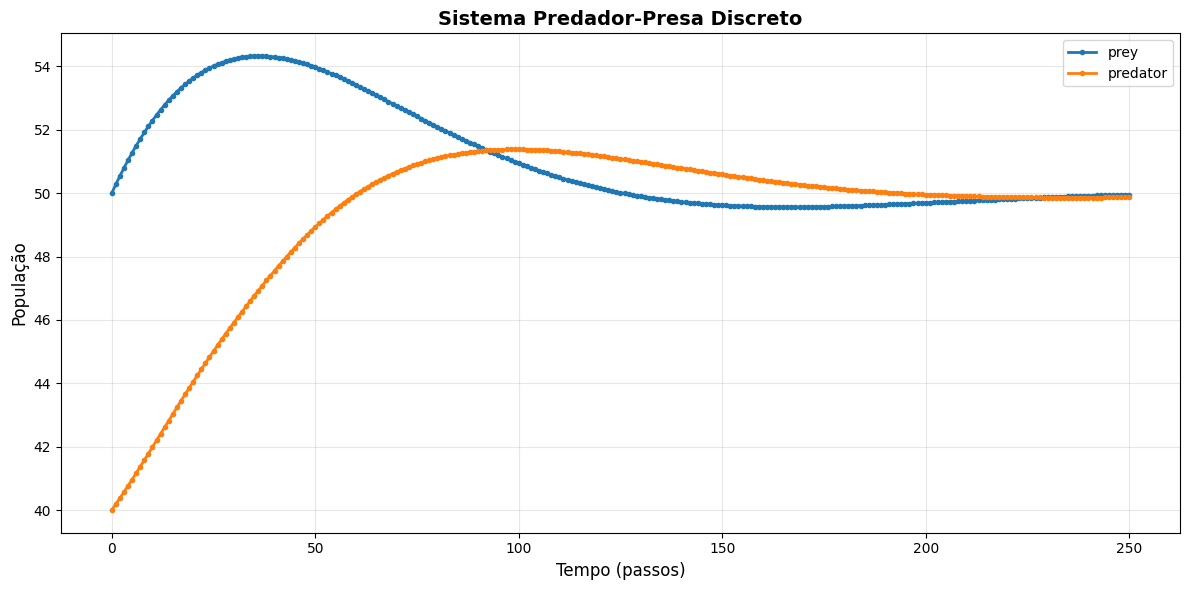

In [6]:
# Condições iniciais (mesmas do livro)
x0 = {'prey': 50, 'predator': 40}

# Número de passos de tempo
n_steps = 250

# Simular
trajectory = pfuzzy.simulate(x0=x0, n_steps=n_steps)

# Plot da dinâmica temporal
fig, ax = pfuzzy.plot_trajectory(
    variables=['prey', 'predator'],
    figsize=(12, 6),
    title='Sistema Predador-Presa Discreto',
    xlabel='Tempo (passos)',
    ylabel='População'
)

plt.show()

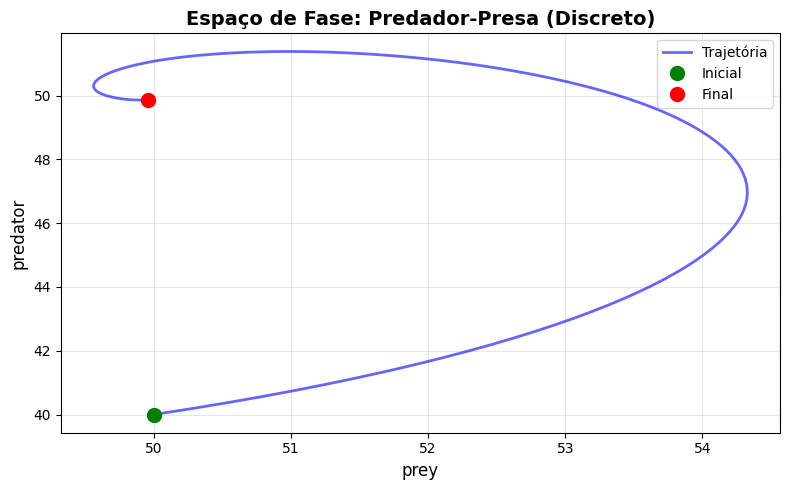

In [7]:
# Plot do espaço de fase
fig, ax = pfuzzy.plot_phase_space(
    'prey', 'predator',
    figsize=(8, 5),
    title='Espaço de Fase: Predador-Presa (Discreto)'
)

plt.show()

🔄 Simulando múltiplas condições iniciais...

1. Presas=30, Predadores=20
2. Presas=50, Predadores=55
3. Presas=70, Predadores=30
4. Presas=40, Predadores=60


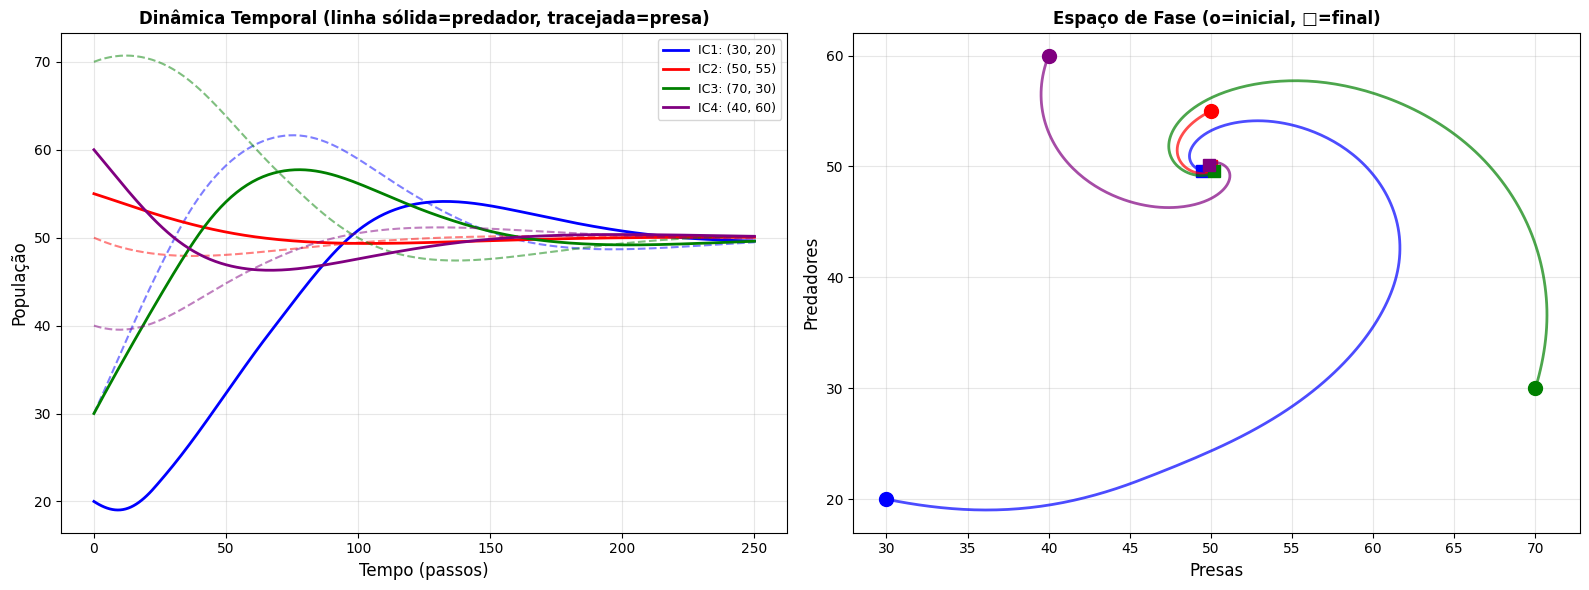

In [8]:
# Diferentes condições iniciais
initial_conditions = [
    {'prey': 30, 'predator': 20},
    {'prey': 50, 'predator': 55},
    {'prey': 70, 'predator': 30},
    {'prey': 40, 'predator': 60}
]

colors = ['blue', 'red', 'green', 'purple']

# Criar figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

print("🔄 Simulando múltiplas condições iniciais...\n")

for i, x0 in enumerate(initial_conditions):
    print(f"{i+1}. Presas={x0['prey']}, Predadores={x0['predator']}")
    
    # Simular
    t,traj = pfuzzy.simulate(x0=x0, n_steps=n_steps)
    time = pfuzzy.time
    
    # Plot temporal
    ax1.plot(time, traj[:, 0], '--', color=colors[i], alpha=0.5, linewidth=1.5)
    ax1.plot(time, traj[:, 1], '-', color=colors[i], linewidth=2, 
             label=f"IC{i+1}: ({x0['prey']}, {x0['predator']})")
    
    # Plot espaço de fase
    ax2.plot(traj[:, 0], traj[:, 1], color=colors[i], linewidth=2, alpha=0.7)
    ax2.plot(traj[0, 0], traj[0, 1], 'o', color=colors[i], markersize=10)
    ax2.plot(traj[-1, 0], traj[-1, 1], 's', color=colors[i], markersize=8)

# Configurar plot temporal
ax1.set_xlabel('Tempo (passos)', fontsize=12)
ax1.set_ylabel('População', fontsize=12)
ax1.set_title('Dinâmica Temporal (linha sólida=predador, tracejada=presa)', 
              fontsize=12, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)

# Configurar plot espaço de fase
ax2.set_xlabel('Presas', fontsize=12)
ax2.set_ylabel('Predadores', fontsize=12)
ax2.set_title('Espaço de Fase (o=inicial, □=final)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


---

## 6️⃣ Exportar Resultados

Podemos exportar a trajetória para um arquivo CSV.

In [9]:
# Exportar para CSV
pfuzzy.to_csv('/tmp/predator_prey_discrete.csv')

print("✅ Dados exportados para: /tmp/predator_prey_discrete.csv")
print("\n📄 Primeiras 5 linhas:")

# Ler e mostrar primeiras linhas
import pandas as pd
df = pd.read_csv('/tmp/predator_prey_discrete.csv')
print(df.head())

✅ Dados exportados para: /tmp/predator_prey_discrete.csv

📄 Primeiras 5 linhas:
   time       prey   predator
0   0.0  40.000000  60.000000
1   1.0  39.907945  59.636614
2   2.0  39.825893  59.272271
3   3.0  39.753864  58.907263
4   4.0  39.691896  58.541877
